In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from collections import defaultdict

In [2]:
%matplotlib inline

In [3]:
from keras.callbacks import Callback
from matplotlib import pyplot as plt
from IPython.display import clear_output
class PlotLearning(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('auc'))
        self.val_acc.append(logs.get('val_auc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True,figsize=(15,10))
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="validation_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()
        
        plt.show();
        
plot = PlotLearning()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
import telepot
def send_notify(text):
    with open('../../_access_keys/telegram_token.txt', 'r') as content_file:
        token = content_file.read()
    with open('../../_access_keys/user.txt', 'r') as content_file:
        user = content_file.read()
    try:
        TelegramBot = telepot.Bot(token)
        TelegramBot.sendMessage(int(user), text)
    except:
        pass

In [212]:
TRAIN = False
DNN = True

In [213]:
path = 'c:/data/mlbootcamp/dataset/'
path_train = path + 'train/'
path_test = path + 'test/'
path_features = 'features/'
if TRAIN:
    pathfiles = path_train
    path_subs_bs_consumption = 'subs_bs_consumption_train.csv'
    path_subs_bs_data_session = 'subs_bs_data_session_train.csv'
    path_subs_bs_voice_session = 'subs_bs_voice_session_train.csv'
    path_subs_features = 'subs_features_train.csv'
    path_subs_csi = 'subs_csi_train.csv'
    path_new_features = 'features.csv'
else:
    pathfiles = path_test
    path_subs_bs_consumption = 'subs_bs_consumption_test.csv'
    path_subs_bs_data_session = 'subs_bs_data_session_test.csv'
    path_subs_bs_voice_session = 'subs_bs_voice_session_test.csv'
    path_subs_features = 'subs_features_test.csv'
    path_subs_csi = 'subs_csi_test.csv'
    path_new_features = 'features.csv'

In [214]:
subs_csi = pd.read_csv(pathfiles + path_subs_csi, sep=';', decimal=',')

In [215]:
subs_csi.head(1)

,SK_ID,CONTACT_DATE
0,6184,02.04


In [216]:
subs_csi.shape

(5221, 2)

In [217]:
cells_2g = set(pd.read_csv(path + '2g.csv')['cell_id'].unique())
cells_3g = set(pd.read_csv(path + '3g.csv')['cell_id'].unique())
cells_4g = set(pd.read_csv(path + '4g.csv')['cell_id'].unique())

In [10]:
# 2G

In [21]:
columns_2g = ['CELL_AVAILABILITY_2G', 'CSSR_2G', 'PSSR_2G', 'TBF_DROP_RATE_2G', 'TCH_DROP_RATE_2G']

In [15]:
bs_avg_kpi_2g = pd.read_csv(path + 'bs_avg_kpi_2g.csv')

In [27]:
bs_avg_kpi_2g.head(1)

,T_DATE,CELL_LAC_ID,CELL_AVAILABILITY_2G,CSSR_2G,PSSR_2G,TBF_DROP_RATE_2G,TCH_DROP_RATE_2G
0,1.01,275453,1.0,0.932420,NaN,0.000055,0.000377
1,17.05,275453,1.0,0.931243,NaN,0.000020,0.000206
2,31.01,275453,1.0,0.931607,NaN,0.000018,0.000173
3,29.01,275453,1.0,0.930856,NaN,0.000020,0.000228
4,2.01,275453,1.0,0.925372,NaN,0.000053,0.000297


In [ ]:
for c in columns_2g:
    bs_avg_kpi_2g[c].fillna(bs_avg_kpi_2g[c].median(), inplace=True)

In [11]:
# 3G

In [22]:
columns_3g = ['CELL_AVAILABILITY_3G', 'CSSR_3G', 'HSPDSCH_CODE_UTIL_3G', 'NODEB_CNBAP_LOAD_HARDWARE', 'PROC_LOAD_3G',
             'PSSR_3G', 'RAB_CS_BLOCKING_RATE_3G', 'RAB_CS_DROP_RATE_3G', 'RAB_PS_BLOCKING_RATE_3G', 'RAB_PS_DROP_RATE_3G',
             'RRC_BLOCKING_RATE_3G', 'RTWP_3G', 'SHO_FACTOR', 'TOTAL_DL_VOLUME_3G', 'UTIL_BRD_CPU_3G', 'UTIL_CE_DL_3G',
             'UTIL_CE_HW_DL_3G', 'UTIL_CE_UL_3G', 'UTIL_SUBUNITS_3G', 'TOTAL_UL_VOLUME_3G']

In [ ]:
# 4G

In [23]:
columns_4g = ['CELL_AVAILABILITY_4G', 'DL_VOLUME_LTE', 'ERAB_PS_BLOCKING_RATE_LTE', 'ERAB_PS_BLOCKING_RATE_PLMN_LTE',
             'ERAB_PS_DROP_RATE_LTE', 'PART_CQI_QPSK_LTE', 'PART_MCS_QPSK_LTE', 'PSSR_LTE', 'RBU_AVAIL_DL', 'UL_VOLUME_LTE',
             'RBU_AVAIL_DL_LTE', 'RBU_AVAIL_UL', 'RBU_OTHER_DL', 'RBU_OTHER_UL', 'RBU_OWN_DL', 'RBU_OWN_UL', 'RRC_BLOCKING_RATE_LTE']

In [14]:
data_columns = ['CELL_AVAILABILITY_2G', 'CELL_AVAILABILITY_3G', 'CELL_AVAILABILITY_4G', 'ERAB_PS_BLOCKING_RATE_LTE',
                'ERAB_PS_BLOCKING_RATE_PLMN_LTE', 'ERAB_PS_DROP_RATE_LTE', 'HSPDSCH_CODE_UTIL_3G', 'NODEB_CNBAP_LOAD_HARDWARE',
                'PART_CQI_QPSK_LTE', 'PART_MCS_QPSK_LTE', 'PROC_LOAD_3G', 'PSSR_2G', 'PSSR_3G', 'PSSR_LTE', 
                'RAB_PS_BLOCKING_RATE_3G', 'RAB_PS_DROP_RATE_3G', 'RBU_AVAIL_DL_LTE', 'RBU_AVAIL_DL', 'RBU_AVAIL_UL', 'RBU_OTHER_DL',
                'RBU_OTHER_UL', 'RBU_OWN_DL', 'RBU_OWN_UL', 'RRC_BLOCKING_RATE_3G', 'RRC_BLOCKING_RATE_LTE', 'RTWP_3G',
                'SHO_FACTOR', 'TBF_DROP_RATE_2G', 'UTIL_BRD_CPU_3G', 'UTIL_CE_DL_3G', 'UTIL_CE_HW_DL_3G', 'UTIL_CE_UL_3G',
                'UTIL_SUBUNITS_3G', 'UL_VOLUME_LTE', 'DL_VOLUME_LTE', 'TOTAL_DL_VOLUME_3G', 'TOTAL_UL_VOLUME_3G', 'AVEUSERNUMBER',
                'AVEUSERNUMBER_PLMN', 'AVR_DL_HSPA_USER_3G', 'AVR_DL_R99_USER_3G', 'AVR_DL_USER_3G', 'AVR_DL_USER_LTE',
                'AVR_TX_POWER_3G', 'AVR_UL_HSPA_USER', 'AVR_UL_R99_USER', 'AVR_UL_USER_3G', 'AVR_UL_USER_LTE',
                'DL_AVR_THROUGHPUT_3G', 'DL_AVR_THROUGHPUT_LTE', 'DL_AVR_THROUGHPUT_R99', 'DL_MEAN_USER_THROUGHPUT_LTE',
                'DL_MEAN_USER_THROUGHPUT_DL_2G', 'DL_MEAN_USER_THROUGHPUT_HSPA3G', 'DL_MEAN_USER_THROUGHPUT_PLTE',
                'DL_MEAN_USER_THROUGHPUT_REL93G', 'HSDPA_USERS_3G', 'HSUPA_USERS_3G', 'RBU_USED_DL', 'RBU_USED_UL',
                'RELATIVE_RBU_USED_DL', 'RELATIVE_RBU_USED_UL', 'RELATIVE_TX_POWER_3G', 'UL_AVR_THROUGHPUT_3G',
                'UL_AVR_THROUGHPUT_LTE', 'UL_AVR_THROUGHPUT_R99', 'UL_MEAN_USER_THROUGHPUT_LTE', 'UL_MEAN_USER_THROUGHPUT_HS3G',
                'UL_MEAN_USER_THROUGHPUT_PLTE', 'UL_MEAN_USER_THROUGHPUT_REL93G'
               ]

In [26]:
target_columns_2g = list(set(columns_2g).intersection(set(data_columns)))
target_columns_2g

['TBF_DROP_RATE_2G', 'PSSR_2G', 'CELL_AVAILABILITY_2G']

In [218]:
subs_bs_consumption = pd.read_csv(pathfiles + path_subs_bs_consumption, sep=';', decimal=',')

In [219]:
subs_bs_consumption.head(1)

,SK_ID,CELL_LAC_ID,MON,SUM_MINUTES,SUM_DATA_MB,SUM_DATA_MIN
0,6357,104453,01.02,0.0,0.0,0.000234


In [220]:
subs_bs_consumption['month'] = subs_bs_consumption['MON'].apply(lambda x:datetime.strptime(x, '%d.%m').month)

In [221]:
def append_data(key, index, i):
    subs_bs_consumption_minutes[key][index] += i[3]
    subs_bs_consumption_data[key][index] += i[4]
    subs_bs_consumption_voice[key][index] += i[5]
    subs_bs_consumption_data[key][index + 1] += 1
    subs_bs_consumption_minutes[key][index + 1] += 1
    subs_bs_consumption_voice[key][index + 1] += 1
        
subs_bs_consumption_data = defaultdict()
subs_bs_consumption_minutes = defaultdict()
subs_bs_consumption_voice = defaultdict()
for i in subs_bs_consumption.values:
    sk_id = i[0]
    m = i[6]
    cell_id = i[1]
    key = (sk_id, m)
    subs_bs_consumption_data.setdefault(key, [0, 0, 0, 0, 0, 0, 0, 0])
    subs_bs_consumption_minutes.setdefault(key, [0, 0, 0, 0, 0, 0, 0, 0])
    subs_bs_consumption_voice.setdefault(key, [0, 0, 0, 0, 0, 0, 0, 0])
    if cell_id in cells_2g:
        append_data(key, 0, i)
    if cell_id in cells_3g:
        append_data(key, 2, i)
    if cell_id in cells_4g:
        append_data(key, 4, i)
    append_data(key, 6, i)

In [122]:
def standart(_mx, _dict):
    for k in _dict:
        item = _dict[key]
        for i in range(8):
            _mx[i] = np.max([_mx[i], item[i]])

if TRAIN:
    data_mx = [0, 0, 0, 0, 0, 0, 0, 0]
    standart(data_mx, subs_bs_consumption_data)
    min_mx = [0, 0, 0, 0, 0, 0, 0, 0]
    standart(min_mx, subs_bs_consumption_minutes)
    voice_mx = [0, 0, 0, 0, 0, 0, 0, 0]
    standart(voice_mx, subs_bs_consumption_voice)

In [223]:
subs_bs_data_session = pd.read_csv(pathfiles + path_subs_bs_data_session, sep=';', decimal=',')

In [224]:
subs_bs_data_session.head(1)

,SK_ID,CELL_LAC_ID,DATA_VOL_MB,START_TIME
0,4992,3442,0.000564,13.03 16:00:00


In [225]:
subs_bs_data_session['day'] = subs_bs_data_session['START_TIME'].apply(lambda x:datetime.strptime(x, '%d.%m %H:%M:%S').date())

In [226]:
user_data_session = defaultdict()
for i in subs_bs_data_session.values:
    sk_id = i[0]
    dt = i[4]
    cell_id = i[1]
    key = (sk_id, dt)
    user_data_session.setdefault(key, defaultdict()).setdefault(cell_id, 0)
    user_data_session[key][cell_id] += i[2]

In [227]:
mx_data = [0.34390804355693994, 3.9075563596610294, 2.1853913163519203, 50, 87, 110]
mx_voice = [2.0988193833333333, 1.9199305166666663, 0.8027777708333333, 73, 66, 21]

In [228]:
mx = [0, 0, 0, 0, 0, 0]

In [229]:
def get_internet_type_id(sk_id, month):
    try:
        return subs_features[(subs_features['SK_ID'] == sk_id) & (subs_features['month'] == (month + 1))]['INTERNET_TYPE_ID'].iloc(0)[0]
    except:
        try:
            return subs_features[(subs_features['SK_ID'] == sk_id) & (subs_features['month'] == (month))]['INTERNET_TYPE_ID'].iloc(0)[0]
        except:
            return subs_features[(subs_features['SK_ID'] == sk_id)]['INTERNET_TYPE_ID'].iloc(0)[0]

In [230]:
def get_cells_data(cell_dict, mxs, list_sk_id, dates, count_days=7):
    table = []
    for i in zip(list_sk_id, dates):
        sk_id = i[0]
        sd = i[1]
        row = []
        table_columns = []
        pre_month = None
        for j in range(count_days):
            cd = sd - timedelta(j)
            if pre_month is None or pre_month != cd.month:
                internet_type_id = get_internet_type_id(sk_id, cd.month)
                pre_month = cd.month
            cells_g = [0, 0, 0, 0, 0, 0, internet_type_id]
            if (sk_id, cd) not in cell_dict:
                row.append(cells_g)
                continue
            item = cell_dict[(sk_id, cd)]
            for key in item:
                cell = (key, item[key])
                if cell[0] in cells_2g:
                    cells_g[0] += cell[1]
                    cells_g[3] += 1
                if cell[0] in cells_3g:
                    cells_g[1] += cell[1]
                    cells_g[4] += 1
                if cell[0] in cells_4g:
                    cells_g[2] += cell[1]
                    cells_g[5] += 1
            for p in range(6):
                #mx[p] = np.max([cells_g[p], mx[p]])
                cells_g[p] /= mxs[p]
            row.append(cells_g)
        table.append(np.array(row))
    return table

In [231]:
mx

[0, 0, 0, 0, 0, 0]

In [232]:
subs_bs_voice_session = pd.read_csv(pathfiles + path_subs_bs_voice_session, sep=';', decimal=',')

In [233]:
subs_bs_voice_session['day'] = subs_bs_voice_session['START_TIME'].apply(lambda x:datetime.strptime(x, '%d.%m %H:%M:%S').date())

In [234]:
subs_bs_voice_session.head(1)

,SK_ID,CELL_LAC_ID,VOICE_DUR_MIN,START_TIME,day
0,9551,211015,0.001875,18.03 19:00:00,1900-03-18


In [235]:
user_voice_session = defaultdict()
for i in subs_bs_voice_session.values:
    sk_id = i[0]
    dt = i[4]
    cell_id = i[1]
    key = (sk_id, dt)
    user_voice_session.setdefault(key, defaultdict()).setdefault(cell_id, 0)
    user_voice_session[key][cell_id] += i[2]

In [236]:
subs_features = pd.read_csv(pathfiles + path_subs_features, sep=';', decimal=',')

In [237]:
subs_features.head(1)

,SNAP_DATE,COM_CAT#1,SK_ID,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,...,COM_CAT#25,COM_CAT#26,COM_CAT#27,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34
0,01.10.01,8,6954,44,12,1,1,12.0,3,NaN,...,1,1,0.014411,0.036439,0.0,0.0,0.040759,0.027579,0.103896,10.0


In [238]:
subs_features.describe()

,COM_CAT#1,SK_ID,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,DEVICE_TYPE_ID,...,COM_CAT#25,COM_CAT#26,COM_CAT#27,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34
count,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58968.000000,58989.000000,54254.000000,58798.000000,...,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,57128.000000
mean,4.475614,6909.303023,40.964231,5.274170,1.939362,0.990541,7.506088,2.418400,875.009032,4.602384,...,0.999898,0.989049,0.016375,0.017566,0.004167,0.004383,0.045646,0.028234,0.105025,5.618996
std,2.187412,1868.652121,22.121673,2.804044,0.238668,0.096799,3.271280,1.655322,513.958120,0.910405,...,0.010085,0.104074,0.024331,0.030751,0.013551,0.020910,0.052554,0.008920,0.011167,3.560419
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019839,0.093571,1.000000
25%,3.000000,5692.000000,25.000000,5.000000,2.000000,1.000000,5.000000,1.000000,394.000000,5.000000,...,1.000000,1.000000,0.001940,0.000873,0.000000,0.000000,0.010227,0.027579,0.103896,2.000000
50%,4.000000,7031.000000,38.000000,5.000000,2.000000,1.000000,7.000000,2.000000,926.000000,5.000000,...,1.000000,1.000000,0.007878,0.006288,0.000039,0.000000,0.029631,0.027579,0.103896,5.000000
75%,6.000000,8399.000000,60.000000,5.000000,2.000000,1.000000,10.000000,3.000000,1315.000000,5.000000,...,1.000000,1.000000,0.020910,0.021304,0.002761,0.000083,0.062445,0.027579,0.103896,9.000000
max,8.000000,9748.000000,83.000000,17.000000,2.000000,1.000000,12.000000,9.000000,1702.000000,8.000000,...,1.000000,1.000000,0.727991,1.000000,0.431942,0.954655,0.678783,1.000000,1.000000,10.000000


In [239]:
subs_features['SNAP_DATE'] = subs_features['SNAP_DATE'].apply(lambda x:datetime.strptime(x, '%d.%m.%y'))

In [240]:
subs_features['COM_CAT#24'].value_counts()

31.12    58983
08.04        1
23.04        1
15.04        1
12.04        1
19.04        1
22.04        1
Name: COM_CAT#24, dtype: int64

In [241]:
subs_features['COM_CAT#24'] = subs_features['COM_CAT#24'].apply(lambda x:int(x == '31.12'))

In [242]:
subs_features['COM_CAT#34'].fillna(subs_features['COM_CAT#34'].median(), inplace=True)
subs_features['COM_CAT#8'].fillna(subs_features['COM_CAT#8'].median(), inplace=True)
subs_features['DEVICE_TYPE_ID'].fillna(subs_features['DEVICE_TYPE_ID'].median(), inplace=True)
subs_features['ARPU_GROUP'].fillna(subs_features['ARPU_GROUP'].median(), inplace=True)
subs_features['INTERNET_TYPE_ID'].fillna(subs_features['INTERNET_TYPE_ID'].median(), inplace=True)

In [243]:
subs_features['month'] = subs_features['SNAP_DATE'].apply(lambda x:x.month)
subs_features['year'] = subs_features['SNAP_DATE'].apply(lambda x:x.year)

In [244]:
columns = ['COM_CAT#1', 'COM_CAT#2', 'COM_CAT#3', 'BASE_TYPE', 'ACT', 'ARPU_GROUP', 'COM_CAT#7', 'COM_CAT#8',
          'DEVICE_TYPE_ID', 'INTERNET_TYPE_ID', 'REVENUE', 'ITC', 'VAS', 'RENT_CHANNEL', 'ROAM',
          'COST']
for i in range(18):
    columns.append('COM_CAT#{}'.format(i+17))
if TRAIN:
    factors = {}
for c in columns:
    #emean =  np.mean(subs_features[c])
    if TRAIN:
        emin = np.min(subs_features[c])
    else:
        emin = factors[c][0]
    #subs_features[c] -= emean
    subs_features[c] -= emin
    if TRAIN:
        emax = np.max(subs_features[c])
    else:
        emax = factors[c][1]
    subs_features[c] /= emax
    if TRAIN:
        factors[c] = (emin, emax)

In [245]:
def get_subs_features(year, month, fix_month, day, sk_id):
    data = subs_features[(subs_features['year'] == year) & (subs_features['month'] == month) & (subs_features['SK_ID'] == sk_id)]
    columns = ['COM_CAT#1', 'COM_CAT#2', 'COM_CAT#3', 'BASE_TYPE', 'ACT', 'ARPU_GROUP', 'COM_CAT#7', 'COM_CAT#8',
              'DEVICE_TYPE_ID', 'INTERNET_TYPE_ID', 'REVENUE', 'ITC', 'VAS', 'RENT_CHANNEL', 'ROAM',
              'COST']
    for i in range(18):
        columns.append('COM_CAT#{}'.format(i+17))
    if data.shape[0] == 1:
        return columns, data[columns].values[0].tolist()
    else:
        return columns, list(np.zeros(len(columns)))

In [128]:
# for dnn
table = []
if TRAIN:
    y = np.zeros(subs_csi.shape[0])
for i in enumerate(subs_csi.values):
    sk_id = int(i[1][0])
    line = []
    if TRAIN:
        dt = str(i[1][2]).split('.')
    else:
        dt = str(i[1][1]).split('.')
    year = 2002
    month = int(dt[1])
    for j in range(12):
        new_line = get_subs_features(year, month, int(dt[1]), int(dt[0]), sk_id)
        line.extend(new_line[1])
        month -= 1
        if month == 0:
            month = 12
            year -= 1
    table.append(line)
    if TRAIN:
        y[i[0]] = i[1][1]

In [187]:
def extend_qos(sk_id, month):
    result = []
    key = (sk_id, month)
    if (key in subs_bs_consumption_data):
        item = subs_bs_consumption_data[key]
        for i in range(8):
            if data_mx[i] != 0:
                result.append(item[i] / data_mx[i])
            else:
                result.append(item[i])
    else:
        result.extend([0,0,0,0,0,0,0,0])
    if (key in subs_bs_consumption_minutes):
        item = subs_bs_consumption_minutes[key]
        for i in range(8):
            if min_mx[i] != 0:
                result.append(item[i] / min_mx[i])
            else:
                result.append(item[i])
    else:
        result.extend([0,0,0,0,0,0,0,0])
    if (key in subs_bs_consumption_voice):
        item = subs_bs_consumption_voice[key]
        for i in range(8):
            if voice_mx[i] != 0:
                result.append(item[i] / voice_mx[i])
            else:
                result.append(item[i])
    else:
        result.extend([0,0,0,0,0,0,0,0])

    #print(result)
    return result

In [246]:
# for cnn
table = []
if TRAIN:
    y = np.zeros(subs_csi.shape[0])
for i in enumerate(subs_csi.values):
    sk_id = int(i[1][0])
    #line = [sk_id]
    #table_columns = ['sk_id']
    if TRAIN:
        dt = str(i[1][2]).split('.')
    else:
        dt = str(i[1][1]).split('.')
    year = 2002
    month = int(dt[1])
    row = []
    for j in range(6):
        new_line = get_subs_features(year, month, int(dt[1]), int(dt[0]), sk_id)

        qos = list(extend_qos(sk_id, month))
        qos.extend(list(new_line[1]))
        row.append(np.array(qos))
        
        #table_columns.extend(new_line[0])
        month -= 1
        if month == 0:
            month = 12
            year -= 1
    table.append(np.array(row))
    if TRAIN:
        y[i[0]] = i[1][1]

In [247]:
data = np.array(table)

In [248]:
data.shape

(5221, 6, 58)

In [249]:
count_days = 30

In [250]:
table2 = get_cells_data(user_data_session, mx_data, list(subs_csi['SK_ID']), list(subs_csi['CONTACT_DATE'].apply(lambda x:datetime.strptime(x, '%d.%m').date())), count_days)

In [251]:
data2 = np.array(table2)

In [252]:
data2.shape

(5221, 30, 7)

In [253]:
data2.max()

1.1264367816091954

In [254]:
table3 = get_cells_data(user_voice_session, mx_voice, list(subs_csi['SK_ID']), list(subs_csi['CONTACT_DATE'].apply(lambda x:datetime.strptime(x, '%d.%m').date())), count_days)

In [255]:
data3 = np.array(table3)

In [256]:
data3.max()

3.373702425378048

In [45]:
#res_data = np.hstack((data, data2, data3))

In [46]:
from sklearn import preprocessing

In [257]:
X = np.asarray(data)
X2 = np.asarray(data2)
X3 = np.asarray(data3)
y = np.asarray(y)

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
X_train_1, X_test_1, X_train_2, X_test_2, X_train_3, X_test_3, y_train, y_test \
    = train_test_split(X, X2, X3, y, test_size=0.2, random_state=42)

In [197]:
from sklearn.utils.class_weight import compute_class_weight

In [198]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Input, GlobalMaxPooling1D, GRU, Bidirectional, LSTM, concatenate
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [199]:
from sklearn.metrics import roc_auc_score
from keras import regularizers

In [200]:
from sklearn import metrics
from keras import backend as K
import tensorflow as tf
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [207]:
def create_dnn_model():
    #build Keras model
    
    dropout = 0.2
    
    x1_input = Input(shape=X_train_1.shape[1:], dtype='float32')

    #x1_layer = Conv1D(128, 3, activation='relu')(x1_input)
    #x1_layer = MaxPooling1D(3)(x1_layer)
    #x1_layer = Conv1D(128, 3, activation='relu')(x1_layer)
    #x1_layer = GlobalMaxPooling1D()(x1_layer)
    x1_layer = GRU(128, dropout=dropout, recurrent_dropout=dropout, return_sequences=True, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x1_input)
    x1_layer = GRU(128, dropout=dropout, recurrent_dropout=dropout, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x1_layer)
    
    
    x2_input = Input(shape=X_train_2.shape[1:], dtype='float32')
    
    #x2_layer = LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True, activation='relu', kernel_regularizer=regularizers.l2(0.005))(x2_input)
    #x2_layer = GRU(16, dropout=0.2, recurrent_dropout=0.2, return_sequences=True, activation='relu', kernel_regularizer=regularizers.l2(0.005))(x2_layer)
    #x2_layer = GRU(16, dropout=0.2, recurrent_dropout=0.2, return_sequences=True, activation='relu', kernel_regularizer=regularizers.l2(0.005))(x2_layer)
    #x2_layer = LSTM(64, dropout=0.2, recurrent_dropout=0.2, activation='relu', kernel_regularizer=regularizers.l2(0.005))(x2_layer)
    
    x2_layer = Conv1D(96, 3, activation='relu')(x2_input)
    x2_layer = MaxPooling1D(3)(x2_layer)
    x2_layer = Conv1D(96, 3, activation='relu')(x2_layer)
    #x2_layer = GlobalMaxPooling1D()(x2_layer)
    x2_layer = GRU(64, dropout=dropout, recurrent_dropout=dropout, return_sequences=True, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x2_layer)
    x2_layer = GRU(64, dropout=dropout, recurrent_dropout=dropout, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x2_layer)
      
        
    x3_input = Input(shape=X_train_3.shape[1:], dtype='float32')
    
    #x3_layer = LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True, activation='relu', kernel_regularizer=regularizers.l2(0.005))(x3_input)
    #x3_layer = GRU(16, dropout=0.2, recurrent_dropout=0.2, return_sequences=True, activation='relu', kernel_regularizer=regularizers.l2(0.005))(x3_layer)
    #x3_layer = GRU(16, dropout=0.2, recurrent_dropout=0.2, return_sequences=True, activation='relu', kernel_regularizer=regularizers.l2(0.005))(x3_layer)
    #x3_layer = LSTM(64, dropout=0.2, recurrent_dropout=0.2, activation='relu', kernel_regularizer=regularizers.l2(0.005))(x3_layer)
    
    x3_layer = Conv1D(96, 3, activation='relu')(x3_input)
    x3_layer = MaxPooling1D(3)(x3_layer)
    x3_layer = Conv1D(96, 3, activation='relu')(x3_layer)
    #x3_layer = GlobalMaxPooling1D()(x3_layer)
    x3_layer = GRU(64, dropout=dropout, recurrent_dropout=dropout, return_sequences=True, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x3_layer)
    x3_layer = GRU(64, dropout=dropout, recurrent_dropout=dropout, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x3_layer)
    
    concatenated = concatenate([x1_layer, x2_layer, x3_layer], axis=-1)
    
    for i in range(3):
        #concatenated = Dropout(0.2)(concatenated)
        concatenated = Dense(128, activation="relu", kernel_initializer="uniform", kernel_regularizer=regularizers.l2(0.001))(concatenated)
    
    preds = Dense(1, activation="sigmoid", kernel_initializer="uniform")(concatenated)

    model = Model([x1_input, x2_input, x3_input], preds)
    model.compile(loss='binary_crossentropy', metrics=[auc], optimizer='adam')
    return model

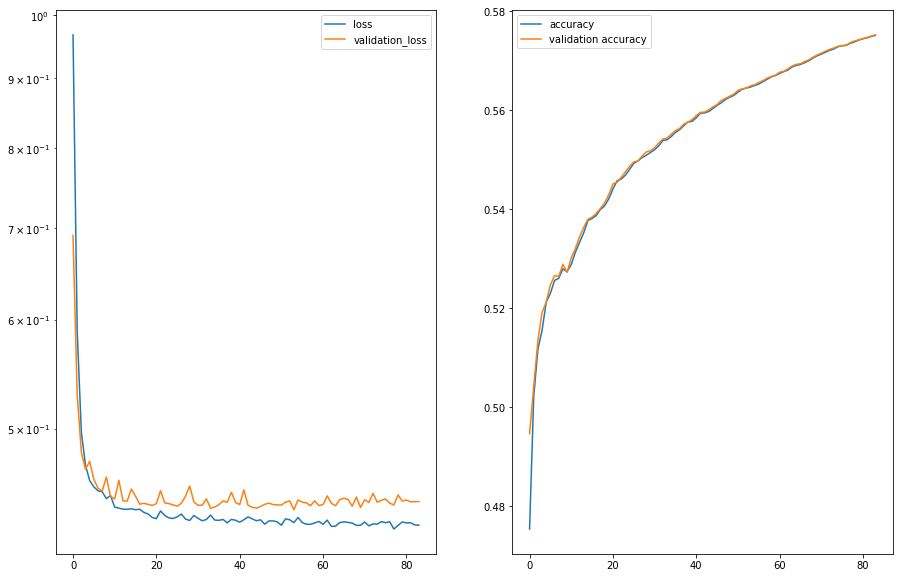

3377/3377 [==============================] - 2s 541us/step - loss: 0.4255 - auc: 0.5752 - val_loss: 0.4426 - val_auc: 0.5753


In [210]:
count_epochs = 300
model = create_dnn_model()
early_stopping_monitor = EarlyStopping(patience=30)
class_weights = compute_class_weight('balanced', np.unique(y), y)
history = model.fit([np.array(X), np.array(X2), np.array(X3)], np.array(y), batch_size = 64, epochs = count_epochs, verbose=1, validation_split=0.2, class_weight=class_weights, callbacks=[plot,early_stopping_monitor])
#class_weights = compute_class_weight('balanced', np.unique(y_train), y_train)
#history = model.fit([np.array(X_train_1), np.array(X_train_2), np.array(X_train_3)], np.array(y_train), batch_size = 64, epochs = count_epochs, verbose=1, validation_split=0.2, class_weight=class_weights, callbacks=[plot,early_stopping_monitor])

In [211]:
send_notify('Complete fit')

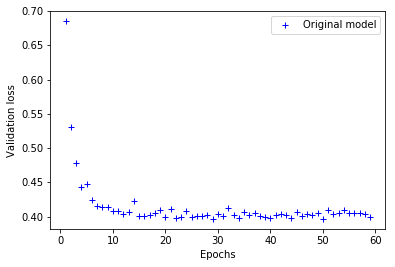

In [203]:
history_gr = history.history['val_loss']
epochs = range(1, len(history_gr) + 1)
import matplotlib.pyplot as plt

plt.plot(epochs, history_gr, 'b+', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [209]:
predict = model.predict([np.array(X_test_1), np.array(X_test_2), np.array(X_test_3)])
score = roc_auc_score(y_test, predict)
print("Total roc auc score = {0:0.4f}".format(score))

Total roc auc score = 0.5407


In [60]:
model_json = model.to_json()
# Записываем модель в файл
json_file = open("sale_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("sale_model.h5")

In [259]:
def save_predict(predict):
    with open('first.csv', 'w') as f:
        for item in predict:
            f.write("%s\n" % item[0])

In [260]:
save_predict(model.predict([np.array(X), np.array(X2), np.array(X3)]))